In [1]:
import numpy as np
import pandas as pd

In [2]:
dp=pd.read_csv(r'C:\Users\Pratham Bisht\Downloads\prices-split-adjusted.csv')

In [3]:
dp

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [4]:
#changing the order of columns
col=list(dp.columns)
dp=dp[[col[2]] + col[4:] + [col[3]]]

In [5]:
dp

,open,low,high,volume,close
0,123.430000,122.309998,126.250000,2163600.0,125.839996
1,125.239998,119.940002,125.540001,2386400.0,119.980003
2,116.379997,114.930000,119.739998,2489500.0,114.949997
3,115.480003,113.500000,117.440002,2006300.0,116.620003
4,117.010002,114.089996,117.330002,1408600.0,114.970001
...,...,...,...,...,...
851259,103.309998,102.849998,103.930000,973800.0,103.199997
851260,43.070000,42.689999,43.310001,1938100.0,43.040001
851261,53.639999,53.270000,53.740002,1701200.0,53.529999
851262,44.730000,44.410000,45.590000,1380900.0,45.450001


In [6]:
dp.isna().any()

open      False
low       False
high      False
volume    False
close     False
dtype: bool

In [7]:
df=dp.values
data=df[:,:-1]
target=df[:,-1]

In [8]:
dp.head()

,open,low,high,volume,close
0,123.430000,122.309998,126.250000,2163600.0,125.839996
1,125.239998,119.940002,125.540001,2386400.0,119.980003
2,116.379997,114.930000,119.739998,2489500.0,114.949997
3,115.480003,113.500000,117.440002,2006300.0,116.620003
4,117.010002,114.089996,117.330002,1408600.0,114.970001


In [9]:
data

array([[1.23430000e+02, 1.22309998e+02, 1.26250000e+02, 2.16360000e+06],
       [1.25239998e+02, 1.19940002e+02, 1.25540001e+02, 2.38640000e+06],
       [1.16379997e+02, 1.14930000e+02, 1.19739998e+02, 2.48950000e+06],
       ...,
       [5.36399990e+01, 5.32700000e+01, 5.37400020e+01, 1.70120000e+06],
       [4.47300000e+01, 4.44100000e+01, 4.55900000e+01, 1.38090000e+06],
       [5.42000010e+01, 5.33899990e+01, 5.44800000e+01, 7.05100000e+05]])

In [10]:
target

array([125.839996, 119.980003, 114.949997, ...,  53.529999,  45.450001,
        53.630001])

In [11]:
data.shape,target.shape

((851264, 4), (851264,))

In [12]:
# Normalization
u=np.mean(data,axis=0)
std=np.std(data,axis=0)
data=(data-u)/std

In [13]:
ones=np.ones((data.shape[0],1))
data=np.hstack((ones,data))

In [14]:
data

array([[ 1.        ,  0.77703978,  0.77859074,  0.79848234, -0.26023189],
       [ 1.        ,  0.80110767,  0.7467614 ,  0.78912878, -0.24240029],
       [ 1.        ,  0.68329454,  0.67947645,  0.71271927, -0.23414878],
       ...,
       [ 1.        , -0.15097125, -0.14862502, -0.15676781, -0.29723966],
       [ 1.        , -0.26944921, -0.26761592, -0.26413633, -0.32287458],
       [ 1.        , -0.14352479, -0.14701342, -0.14701904, -0.37696162]])

In [15]:
# Splitting data into training and testing
split=0.8
train_x=data[:int(split*data.shape[0]),:]
test_x=data[int(split*data.shape[0]):,:]
train_y=target[:int(split*target.shape[0])]
test_y=target[int(split*target.shape[0]):]

In [16]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((681011, 5), (170253, 5), (681011,), (170253,))

# Normal/Unoptimized Method

In [17]:
# def Hypothesis(x,weights):
#     y_pred=0
#     for i in range(x.shape[0]):
#         y_pred+=weights[i] * x[i]
#     return y_pred

In [18]:
# def loss_func(x,weights,y):
#     loss=0
#     for i in range(x.shape[0]):
#         y_pred=Hypothesis(x[i],weights)
#         loss+=(y_pred-y[i])**2
#     return loss/x.shape[0]    

In [19]:
# def gradient(x,y,weights):
#     grad=np.zeros((x.shape[1],))
    
#     for j in range(x.shape[1]):
#         for i in range(x.shape[0]):
#             y_pred=Hypothesis(x[i],weights)
#             grad[j]+=(y_pred-y[i])*x[i][j]
#     return grad/x.shape[0]        

In [20]:
# def gradient_descent(x,y,batch_size=100):
#     weights = np.zeros((x.shape[1],))
#     lr_rate= 0.03
#     loss_epoch=[]
#     epochs=1000
    
#     for i in range(epochs):
#         grad= gradient(x,y,weights)

#         loss_epoch.append(loss_func(x,weights,y))
        
#         for j in range(x.shape[1]):
#             weights[j] = weights[j] - lr_rate * grad[j]
        
        
#     return weights , loss_epoch

In [21]:
# import time
# start = time.time()
# weights, loss_epoch = gradient_descent(train_x, train_y)
# print(time.time() - start)

In [22]:
# weights

In [23]:
# loss_epoch

In [24]:
# import matplotlib.pyplot as plt
# plt.plot(loss_epoch)
# plt.show()

# Optimization

In [25]:
def hypothesis(x, weights):
    return np.dot(x, weights)

In [26]:
def loss_func(x, weights, y):
    loss = 0
    y_pred = hypothesis(x, weights)
    loss = np.sum((y_pred - y)**2)
    return loss/x.shape[0]

In [27]:
def gradient(x, y, weights):
    y_pred = hypothesis(x, weights)
    grad = np.dot(x.T, (y_pred - y))
        
    return grad/x.shape[0]

In [28]:
def gradient_descent(x, y):
    weights = np.zeros((x.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 1000
    
    for i in range(epochs):
        
        grad = gradient(x, y, weights)
        
        loss_epoch.append(loss_func(x, weights, y))
        
        weights = weights - lr_rate * grad
        
    return weights, loss_epoch

In [29]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_x, train_y)
print(time.time() - start)

75.04283261299133


In [30]:
weights

array([ 6.50071258e+01,  2.49518962e+01,  2.51248311e+01,  2.51113415e+01,
       -6.83003928e-03])

In [31]:
loss_epoch

[7946.192295486229,
 7227.286523291896,
 6585.014378107776,
 6010.185372304306,
 5494.787652742665,
 5031.831762187791,
 4615.215427832191,
 4239.60652799684,
 3900.3417752019536,
 3593.338988255748,
 3315.0211149639495,
 3062.2504167102716,
 2832.2714418489804,
 2622.6616012070867,
 2431.288320007886,
 2256.2718796491945,
 2095.9531829774746,
 1948.8657805675193,
 1813.7115852694847,
 1689.3397798417334,
 1574.728489508399,
 1468.9688491981415,
 1371.2511452735187,
 1280.8527548184702,
 1197.127642938617,
 1119.4972108439454,
 1047.4423154153562,
 980.496305101665,
 918.2389378663937,
 860.2910649489631,
 806.3099798068235,
 755.9853450955577,
 709.0356222097954,
 665.2049379967337,
 624.2603319801462,
 585.9893349809394,
 550.1978365504319,
 516.7082042826082,
 485.3576229609466,
 455.9966257271567,
 428.48779312233216,
 402.70459902261894,
 378.5303852380353,
 355.85744892203263,
 334.58622900046015,
 314.6245796147009,
 295.8871201219995,
 278.2946525384908,
 261.77363847488044,
 2

In [32]:
import matplotlib.pyplot as plt

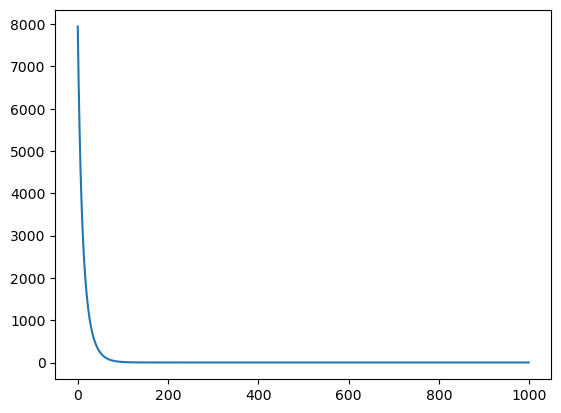

In [33]:
plt.plot(loss_epoch)
plt.show()

In [34]:
y_pred = []

for i in range(test_x.shape[0]):
    pred = hypothesis(test_x[i], weights)
    print(pred, test_y[i],sep='\t')
    y_pred.append(pred)

99.65503104486734	97.75
84.90581682897056	83.040001
40.54489129744416	39.75
91.30632607140146	88.68
43.91780129707029	42.630001
71.35995486317512	69.690002
45.28136324468584	43.52
39.0119420481507	37.0
89.14528886117276	87.019997
53.81411955940156	52.099998
32.07907929249289	31.139999
134.90223488285852	132.179993
160.33227016707326	153.259995
112.46803895799044	109.980003
32.59275853586908	31.82
83.65416786212172	80.559998
96.63193997914371	94.459999
29.17526618817561	28.82
62.69758940978182	60.830002
41.304895018376456	39.759998
91.93420068330704	88.800003
70.02564299832666	66.970001
79.46224031278055	77.099998
70.57687699862473	69.129997
39.47283446800223	38.580002
59.76513510432286	57.610001
89.47937789969075	86.010002
87.8157769362312	84.800003
72.76824750940061	70.769997
67.0953947813087	65.919998
124.81448272871629	121.169998
57.22413529745207	54.959999
45.00589081386997	43.5
119.36712692318375	116.830002
83.95554772679063	81.0
77.70342497849623	75.160004
48.705028743098126	47.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



63.04442832635273	62.900002
47.14843037327866	47.23
30.49233061416274	30.370001
178.03116692673314	177.179993
62.8654894774435	62.73
21.722015024316644	21.67
71.22573831099982	71.459999
40.828942953077586	40.900002
19.017538317009052	18.940001
29.000490963662187	28.58
70.6629175516063	70.5
100.71678259211447	101.809998
116.84016497417272	118.860001
42.817308369202635	42.84
32.500569866904456	32.580002
46.53776104601786	46.68
90.88648810309346	91.529999
63.361558753544635	63.400002
9.80002586253746	9.83
46.14531658848455	45.990002
37.392527495382694	37.400002
60.62702570208197	60.5966923077
118.50746262713882	118.589996
26.669963274115617	26.82
47.079837312373016	47.290001
41.67545479987183	41.740002
46.210781147768955	46.029999
30.084485112380204	29.889999
154.32298572396184	153.160004
96.16767775251785	95.550003
60.383942930975834	60.389999
76.72614373547198	77.129997
38.111287562252286	38.740002
119.89842666343682	119.029999
95.30735324440187	94.010002
57.18066659597194	56.849998
42.

# MSE MAE RMSE [Finding Error]

In [35]:
def MSE(y_t,y_p):
    err=np.sum((y_t-y_p)**2)
    err=err/y_t.shape[0]
    return err

In [36]:
def MAE(y_t,y_p):
    err=(abs((y_t-y_p))).sum()
    err=err/y_t.shape[0]
    return err

In [37]:
def RMSE(y_t,y_p):
    err=np.sum((y_t-y_p)**2)
    err=(err/y_t.shape[0])**0.5
    return err

In [38]:
print(MSE(test_y,y_pred))
print(RMSE(test_y,y_pred))
print(MAE(test_y,y_pred))

1.3891854461441102
1.1786371138497678
0.5760518426578495


In [39]:
def R2_score(y_t, y_p):
    numerator = np.sum((y_t - y_p)**2)
    denominator = np.sum((y_t - np.array(y_p).mean())**2)
    return 1 - numerator/denominator

In [40]:
print(R2_score(test_y, y_pred))

0.9998679496117726


# "SKlearn" MSE MAE RMSE 

In [41]:
from sklearn import metrics

In [42]:
y_pred=hypothesis(test_x,weights)
print(y_pred.shape)

(170253,)


In [43]:
print('MSE',metrics.mean_squared_error(y_pred,test_y))
print('RMSE',metrics.mean_squared_error(y_pred,test_y)**0.5)
print('MAE',metrics.mean_absolute_error(y_pred,test_y))

MSE 1.3891854461441107
RMSE 1.1786371138497678
MAE 0.5760518426578494


In [44]:
print('R2 Score',metrics.r2_score(y_pred,test_y))

R2 Score 0.9998678578326198
